<a href="https://colab.research.google.com/github/Mamadyc/Pr-diction-des-couts-d-assurance-maladies/blob/main/TP_R%C3%A9seau_de_neurone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP Réseau de neurone (prédiction des cas de décès ou non pendant les day_28)
# Réseau de neurone avec 4 Couche pour la prédiction (day_28)

# 1) DATA MANAGEMENT/PRETAITEMENT

In [ ]:
### importation des librairies
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Chargement de la base de donnée
df = pd.read_csv("/content/data_tot.csv", sep=";")
df.describe()

,Unnamed: 0,aline_flg,hospital_los_day,gender_num,sapsi_first,sofa_first,service_num,day_icu_intime_num,hour_icu_intime,hosp_exp_flg,...,hr_1st,spo2_1st,abg_count,platelet_first,sodium_first,tco2_first,chloride_first,bun_first,po2_first,pco2_first
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,678.153935,0.649306,9.097222,0.578704,14.418981,6.143519,0.539352,4.039352,11.064815,0.146991,...,88.652778,98.302083,7.473380,244.089120,139.508102,24.296296,103.951389,18.943287,221.564815,42.930556
std,392.941087,0.477464,8.544196,0.494053,3.981174,2.217649,0.498738,1.999033,8.119785,0.354302,...,18.922230,6.122556,8.898383,99.159119,4.577382,5.077402,5.697467,13.302097,141.058301,13.180001
min,1.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,30.000000,4.000000,0.000000,7.000000,118.000000,2.000000,80.000000,2.000000,22.000000,8.000000
25%,340.500000,0.000000,4.000000,0.000000,12.000000,5.000000,0.000000,2.000000,3.000000,0.000000,...,76.000000,98.000000,2.000000,177.000000,137.000000,22.000000,101.000000,11.000000,105.000000,36.000000
50%,663.500000,1.000000,7.000000,1.000000,14.000000,6.000000,1.000000,4.000000,10.000000,0.000000,...,88.000000,100.000000,4.000000,237.000000,140.000000,24.000000,104.000000,15.000000,191.000000,41.000000
75%,1006.250000,1.000000,11.000000,1.000000,17.000000,7.000000,1.000000,6.000000,19.000000,0.000000,...,101.000000,100.000000,9.000000,299.000000,142.000000,27.000000,107.000000,22.000000,304.250000,47.000000
max,1385.000000,1.000000,101.000000,1.000000,32.000000,16.000000,1.000000,7.000000,23.000000,1.000000,...,154.000000,100.000000,69.000000,900.000000,165.000000,49.000000,133.000000,126.000000,617.000000,151.000000


In [ ]:
## exploration des données
df.info()
df.head(20) ## affichages des 20 prèmières lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          864 non-null    int64 
 1   aline_flg           864 non-null    int64 
 2   icu_los_day         864 non-null    object
 3   hospital_los_day    864 non-null    int64 
 4   age                 864 non-null    object
 5   gender_num          864 non-null    int64 
 6   weight_first        864 non-null    object
 7   bmi                 864 non-null    object
 8   sapsi_first         864 non-null    int64 
 9   sofa_first          864 non-null    int64 
 10  service_unit        864 non-null    object
 11  service_num         864 non-null    int64 
 12  day_icu_intime      864 non-null    object
 13  day_icu_intime_num  864 non-null    int64 
 14  hour_icu_intime     864 non-null    int64 
 15  hosp_exp_flg        864 non-null    int64 
 16  icu_exp_flg         864 no

,Unnamed: 0,aline_flg,icu_los_day,hospital_los_day,age,gender_num,weight_first,bmi,sapsi_first,sofa_first,...,platelet_first,sodium_first,potassium_first,tco2_first,chloride_first,bun_first,creatinine_first,po2_first,pco2_first,iv_day_1
0,1,1,"7,63",13,"72,36841",1,75,"29,91279129",15,9,...,354,138,"4,6",15,109,41,"1,6",196,39,"2230,875"
1,3,0,"2,86",5,"36,5",0,70,"27,11827188",16,5,...,295,144,"3,9",17,101,16,"0,8",298,30,"2086,800293"
2,5,1,"1,75",5,"23,74217",1,"95,2","28,4645631",18,7,...,22,146,"3,4",19,110,10,1,134,30,"2358,244141"
3,7,1,"7,06",27,"24,64717",1,90,"25,47485007",15,6,...,130,143,"3,8",32,104,17,"1,3",38,62,"648,5999756"
4,9,1,"3,79",4,"71,43198",0,"52,6","21,91082049",9,5,...,238,143,4,25,107,15,"0,7",212,41,"756,6739502"
5,10,1,"7,14",7,"25,41667",0,"61,5","21,54318406",13,9,...,137,143,"3,7",28,104,2,"0,3",284,33,"3593,86377"
6,11,1,"1,13",2,"51,18725",1,"91,1","32,77231515",16,5,...,423,144,"3,8",32,111,15,"0,9",76,56,"545,592041"
7,14,1,"12,85",18,"18,23023",0,"52,4","21,82750939",10,6,...,154,141,"3,6",20,111,10,"0,8",447,34,"999,7940063"
8,15,1,"5,73",14,"74,77376",0,69,"23,12937152",13,6,...,237,138,"3,9",27,99,15,"1,1",104,74,54
9,19,0,"3,71",4,"41,9727",1,"94,8","29,98781508",6,4,...,255,143,"3,2",24,108,10,"0,8",274,39,200


In [ ]:
## exploration des données
print(df)

     Unnamed: 0  aline_flg icu_los_day  hospital_los_day       age  \
0             1          1        7,63                13  72,36841   
1             3          0        2,86                 5      36,5   
2             5          1        1,75                 5  23,74217   
3             7          1        7,06                27  24,64717   
4             9          1        3,79                 4  71,43198   
..          ...        ...         ...               ...       ...   
859        1376          1        4,93                10  53,96671   
860        1378          1        2,46                 8  44,06751   
861        1380          0        1,35                 3  35,57121   
862        1382          1        4,08                 7  76,81676   
863        1385          0        1,86                 3  48,38889   

     gender_num weight_first          bmi  sapsi_first  sofa_first  ...  \
0             1           75  29,91279129           15           9  ...   
1        

Présence des valeurs non numériques donc on va régrouper toutes les valeurs numériques

In [ ]:
# Supprimer toutes les colonnes non numériques
df_numeric = df.select_dtypes(include=['number'])
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          864 non-null    int64
 1   aline_flg           864 non-null    int64
 2   hospital_los_day    864 non-null    int64
 3   gender_num          864 non-null    int64
 4   sapsi_first         864 non-null    int64
 5   sofa_first          864 non-null    int64
 6   service_num         864 non-null    int64
 7   day_icu_intime_num  864 non-null    int64
 8   hour_icu_intime     864 non-null    int64
 9   hosp_exp_flg        864 non-null    int64
 10  icu_exp_flg         864 non-null    int64
 11  day_28_flg          864 non-null    int64
 12  censor_flg          864 non-null    int64
 13  sepsis_flg          864 non-null    int64
 14  chf_flg             864 non-null    int64
 15  afib_flg            864 non-null    int64
 16  renal_flg           864 non-null    int64
 1

In [ ]:
#vérification si on a des valeurs manquantes
valeur_manquante= df_numeric.apply(lambda x: x.isnull().sum())

# le nombre de valeurs manquantes dans chaque colonne
print("Nombre de valeurs manquantes dans chaque colonne :")
print(valeur_manquante)

Nombre de valeurs manquantes dans chaque colonne :
Unnamed: 0            0
aline_flg             0
hospital_los_day      0
gender_num            0
sapsi_first           0
sofa_first            0
service_num           0
day_icu_intime_num    0
hour_icu_intime       0
hosp_exp_flg          0
icu_exp_flg           0
day_28_flg            0
censor_flg            0
sepsis_flg            0
chf_flg               0
afib_flg              0
renal_flg             0
liver_flg             0
copd_flg              0
cad_flg               0
stroke_flg            0
mal_flg               0
resp_flg              0
hr_1st                0
spo2_1st              0
abg_count             0
platelet_first        0
sodium_first          0
tco2_first            0
chloride_first        0
bun_first             0
po2_first             0
pco2_first            0
dtype: int64


on voit qu'on a pas de valeurs manquantes dans notre jeu de donnée

# 2)SEPARATION DES DONNEES/TEST D'ENTRAINEMENT


In [ ]:

# Sélectionner aléatoirement 200 lignes à partir du DataFrame
mc = df_numeric.sample(n=200)

# Afficher les premières lignes du DataFrame sélectionné aléatoirement pour vérifier
print(mc.head())


     Unnamed: 0  aline_flg  hospital_los_day  gender_num  sapsi_first  \
389         604          1                 6           0            9   
614         961          1                 8           0           14   
603         945          1                 2           1           14   
795        1263          0                 1           1           15   
247         387          0                 8           1           17   

     sofa_first  service_num  day_icu_intime_num  hour_icu_intime  \
389           5            0                   7                4   
614           4            1                   2               19   
603           3            1                   7                5   
795           6            0                   7               14   
247           5            0                   2               15   

     hosp_exp_flg  ...  hr_1st  spo2_1st  abg_count  platelet_first  \
389             0  ...      92        95          6             192   
614 

In [ ]:
mc.describe()
mc.info()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 389 to 11
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          200 non-null    int64
 1   aline_flg           200 non-null    int64
 2   hospital_los_day    200 non-null    int64
 3   gender_num          200 non-null    int64
 4   sapsi_first         200 non-null    int64
 5   sofa_first          200 non-null    int64
 6   service_num         200 non-null    int64
 7   day_icu_intime_num  200 non-null    int64
 8   hour_icu_intime     200 non-null    int64
 9   hosp_exp_flg        200 non-null    int64
 10  icu_exp_flg         200 non-null    int64
 11  day_28_flg          200 non-null    int64
 12  censor_flg          200 non-null    int64
 13  sepsis_flg          200 non-null    int64
 14  chf_flg             200 non-null    int64
 15  afib_flg            200 non-null    int64
 16  renal_flg           200 non-null    int64
 17  l

In [ ]:
from sklearn.model_selection import train_test_split

# Séparation des données caractéristiques (X) et cible (y)
X = df_numeric.drop(columns=["day_28_flg"])
y = df_numeric["day_28_flg"]

# Assurez-vous d'avoir mis à l'échelle vos caractéristiques (X) avant la division des données
# Exemple de mise à l'échelle :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Assurez-vous d'avoir importé train_test_split
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la forme (shape) des ensembles de données
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X: (864, 32)
Shape of y: (864,)
Shape of X_train: (691, 32)
Shape of X_test: (173, 32)
Shape of y_train: (691,)
Shape of y_test: (173,)


# 3-Construction du modele de Réseau de neurone

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Fixer une graine aléatoire pour rendre les résultats reproductibles
random_seed = 42
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

# Séparation des données en ensembles d'entraînement et de test avec une graine aléatoire fixée
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Modèle de réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision du test : {accuracy:.4f}")

# Prédictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcul de la précision
precision_test = accuracy_score(y_test, y_pred_binary)
print(f"Précision du test (binaire) : {precision_test:.4f}")

# Afficher la matrice de confusion et le rapport de classification
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_binary))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_binary))


Epoch 1/10
18/18 [==============================] - 2s 15ms/step - loss: 2.6088 - accuracy: 0.7246 - val_loss: 1.0412 - val_accuracy: 0.8417
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8394 - accuracy: 0.7717 - val_loss: 0.5871 - val_accuracy: 0.8129
Epoch 3/10
18/18 [==============================] - 0s 5ms/step - loss: 0.5551 - accuracy: 0.8043 - val_loss: 0.4785 - val_accuracy: 0.8345
Epoch 4/10
18/18 [==============================] - 0s 5ms/step - loss: 0.4913 - accuracy: 0.8243 - val_loss: 0.4323 - val_accuracy: 0.8273
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.4864 - accuracy: 0.8225 - val_loss: 0.5551 - val_accuracy: 0.8561
Epoch 6/10
18/18 [==============================] - 0s 5ms/step - loss: 0.4397 - accuracy: 0.8460 - val_loss: 0.4302 - val_accuracy: 0.8273
Epoch 7/10
18/18 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.8388 - val_loss: 0.4872 - val_accuracy: 0.8345
Epoch 8/10
18/18 [=

In [ ]:
# modèle de réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
#  modèle compilé
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Précision du test : {accuracy:.4f}")

# prédictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calcul de la précision
precision_test = accuracy_score(y_test, y_pred_binary)
print(f"Précision du test (binaire) : {precision_test:.4f}")

# Afficher la matrice de confusion et le rapport de classification
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred_binary))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred_binary))



Epoch 1/10
18/18 [==============================] - 2s 14ms/step - loss: 4.3435 - accuracy: 0.7319 - val_loss: 1.2007 - val_accuracy: 0.7410
Epoch 2/10
18/18 [==============================] - 0s 4ms/step - loss: 1.2205 - accuracy: 0.7337 - val_loss: 1.0073 - val_accuracy: 0.7914
Epoch 3/10
18/18 [==============================] - 0s 4ms/step - loss: 0.8472 - accuracy: 0.7482 - val_loss: 1.0322 - val_accuracy: 0.7626
Epoch 4/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.7826 - val_loss: 0.6618 - val_accuracy: 0.7914
Epoch 5/10
18/18 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.8007 - val_loss: 0.7112 - val_accuracy: 0.7986
Epoch 6/10
18/18 [==============================] - 0s 4ms/step - loss: 0.4984 - accuracy: 0.8007 - val_loss: 0.7464 - val_accuracy: 0.8417
Epoch 7/10
18/18 [==============================] - 0s 4ms/step - loss: 0.4352 - accuracy: 0.8279 - val_loss: 0.7873 - val_accuracy: 0.7410
Epoch 8/10
18/18 [=

# 4) VISUALISATION/REPRESENTATION GRAPHIQUE

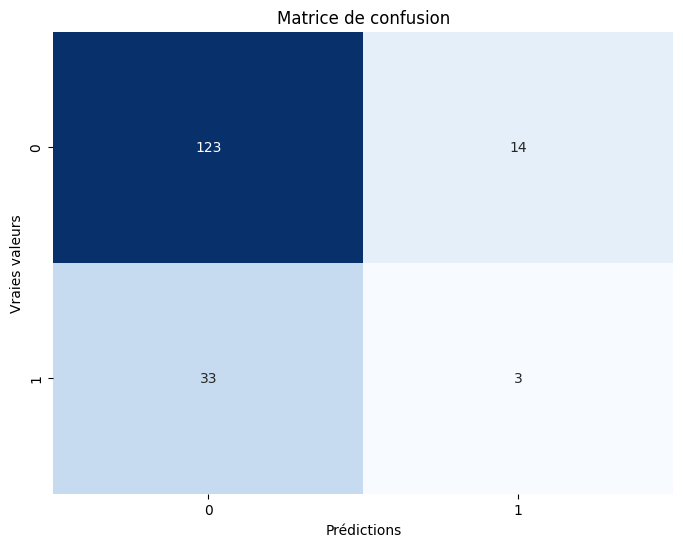

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_binary), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de confusion')
plt.show()

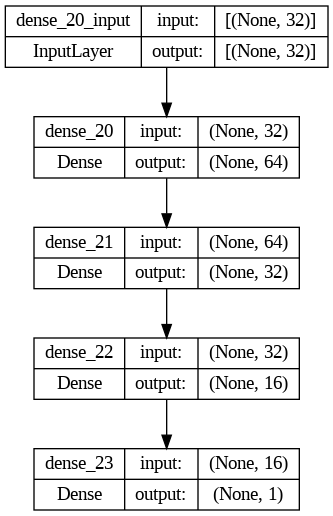

In [ ]:
# Représentation graphique du modèle
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Réseau de neurone avec 4 couches

6/6 [==============================] - 0s 3ms/step


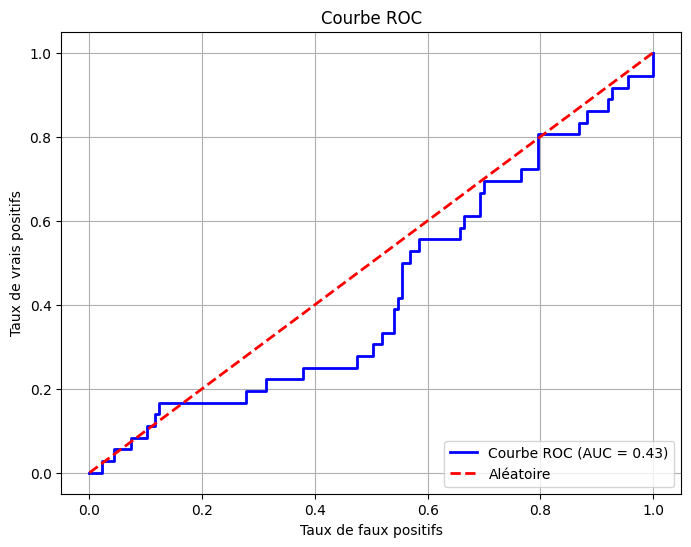

In [ ]:
# Calculer les scores de probabilité des classes positives avec predict()
y_prob = model.predict(X_test)

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Représentation graphique de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


6/6 [==============================] - 0s 2ms/step


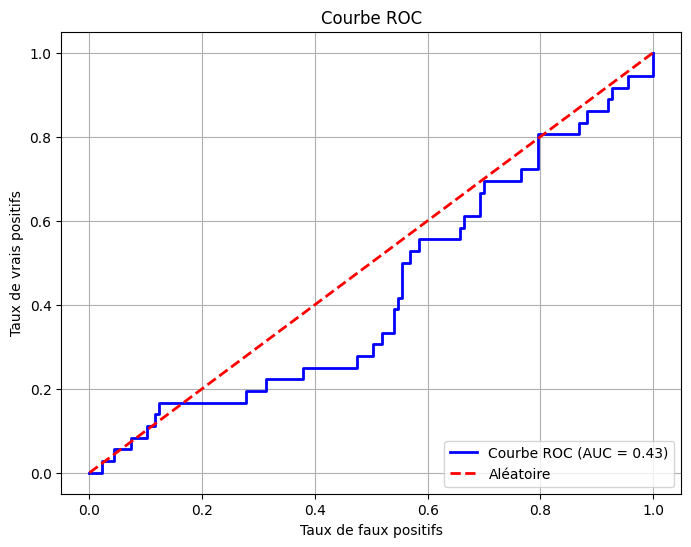

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculer les scores de probabilité des classes positives avec predict()
y_prob = model.predict(X_test)

# Calculer le taux de faux positifs, le taux de vrais positifs et les seuils
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculer l'AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Représentation graphique de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aléatoire')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# On a un modèle de prédiction avec une performance de 98%
